# 使用Scikit-learn进行分类器之旅

本章我们将要学习学术界和工业界常用的几种机器学习算法。在学习算法之间差异的同时，我们也要了解每个算法的优缺点。我们不会像上一章亲自实现各个算法，而是直接调用易用的scikit-learn库。

本章涉及到的知识点包括：
* 介绍常用分类算法的概念
* 学习使用scikit-learn
* 如何选择机器学习算法



## 如何选择合适的分类器算法

对于一个具体的分类问题，如何选择合适的分类器算法绝非纸上谈兵就能确定的：每一个算法都有其独特的数据偏好和假设。再一次强调"No Free Lunch"定理：在所有场景下都最厉害的分类器是不存在滴。实际上，常用的做法就是多选择几个分类器试试，然后挑选效果最好的那一个。对于同一个问题，样本数的不同、特征数目的多少、数据集中的噪音和数据是否线性可分 都会影响到分类器的效果。


最终，分类器的性能、计算能力和预测能力，都极大依赖训练集。我们概况一下训练一个机器学习算法通常的5大步骤：
* 特征选择
* 选择性能评价指标
* 选择分类器和优化算法
* 评估模型的性能
* 模型调参

本书的内容贯穿上面的5大步骤，不要心急，本章重点关注常用算法的重要概念，至于特征选择、预处理、评价指标和如何调参将在后面章节一一介绍。







## scikit-learn之旅

在第二章，你学习了两个分类相关的算法：感知机和Adaline，并且都用Python进行了实现。现在我们学习scikit-learn的API，这个库不但用户界面友好并且对常用算法的实现进行了高度优化。此外，它还包含数据预处理和调参和模型评估的很多方法，是Python进行数据挖掘的必备工具。



### 通过scikit-learn训练感知机模型

我们先看一下如何使用sklearn训练一个感知机模型，数据集还是用我们熟悉的Iris数据集。由于sklearn已经内置了Iris数据集，所以本章所有的分类算法我们通通使用Iris数据集，还是和第二章一样，为了可视化方便，我们只使用其中两维度特征，样本数则使用三个类别全部的150个样本。

In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [3]:
np.unique(y)

array([0, 1, 2])

为了评估训练好的模型对新数据的预测能力，我们先把Iris训练集分割为两部分：训练集和测试集。在第5章我们还会讨论模型评估的更多细节。

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

通过调用train_tset_split方法我们将数据集随机分为两部分，测试集占30%(45个样本)，训练集占70%(105个样本)。

许多机器学习和优化算法都要求对特征进行缩放操作，回忆第二章中梯度下降的例子，当时我们自己实现了标准化代码，现在我们可以直接调用sklearn中的StandardScaler来对特征进行标准化：

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

上面的代码中我们先从preprocessing模块中读取StandardScaler类，然后得到一个初始化的StandardScaler新对象sc，使用fit方法，StandardScaler对训练集中**每一维度特征**计算出u (样本平均值)和$\sigma$ (标准差)，然后调用transform方法对数据集进行标准化。注意我们用相同的标准化参数对待训练集和测试集。


对数据标准化以后，我们可以训练一个感知机模型。sklearn中大多数算法都支持多类别分类，默认使用One-vs.-Rest方式实现。所以我们可以直接训练三分类的感知机模型:

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)


sklearn中训练模型的接口和我们在第二章实现的一样耶，从linear_model模型读取Perceptron类，然后初始化得到ppn，接着使用fit方法训练一个模型。这里的eta0就是第二章中的学习率eta，n_iter同样表示对训练集迭代的次数。我们设置random_state参数使得shuffle结果可再现。

训练好感知机模型后，我们可以使用predict方法进行预测了：

In [7]:
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: {}".format((y_test != y_pred).sum()))

Misclassified samples: 4



对于测试集中45个样本，有4个样本被错分类了，因此，错分类率是0.089。除了使用错分类率，我们也可以使用分类准确率(accuracy)评价模型，accuracy=1-miscassification error = 1-0.089=0.911。

Sklearn中包含了许多评价指标，这些指标都位于metrics模块，比如，我们可以计算分类准确率:

In [10]:
from sklearn.metrics import accuracy_score

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.911111111111



**Notes** 本章我们评估模型性能的好坏仅仅依赖于其在测试集的表现。在第5章，你将会学习许多其他的技巧来评估模型，包括可视化分析来检测和预防过拟合(overfitting)。过拟合意味着模型对训练集中的模式捕捉的很好，但是其泛化能力却很差。


最后，我们使用第二章的plot_decision_regions画出分界区域。不过在使用之间，我们进行一点小修改，我们用圆圈表示测试集样本：


In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, slpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o',
                    s=55, label='test set')

经过上面的修改，现在可以区分训练集和测试集，运行如下代码：

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

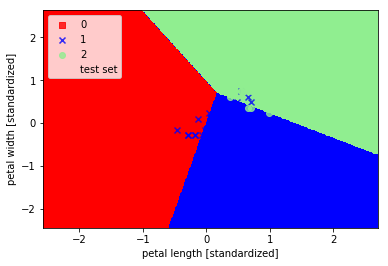

In [14]:
plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=ppn,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


对结果可视化后，我们可以发现三个类别的花不能被线性决策界完美分类。

在第二章我们就说过，感知机对于不能够线性可分的数据，算法永远不会收敛，这也是为什么我们不推荐大家实际使用感知机的原因。在接下来的章节，我们将学习到其他线性分类器，即使数据不能完美线性分类，也能收敛到最小的损失值。

## 逻辑斯蒂回归对类别概率建模

感知机算法为我们学习机器学习分类问题曾经立下汗马功劳，但由于其致命缺点：**如果数据不能完全线性分割，则算法永远不会收敛**。我们实际上很少真正使用感知机模型。

接下来我们学习另一个非常有效的线性二分类模型：逻辑斯蒂回归(logistic regression)。注意，尽管模型名字中有“回归”的字眼，但她确是百分百的分类模型。

### 逻辑斯蒂回归和条件概率

逻辑斯蒂回归(以下简称逻辑回归)是一个分类模型，它易于实现，并且对于线性可分的类别数据性能良好。她是工业界最常用的分类模型之一。和感知机和Adaline相似，本章的逻辑回归模型也是用于二分类的线性模型，当然可以使用OvR技巧扩展为多分类模型。

逻辑回归作为一个概率模型，为了解释其背后的原理，我们先介绍一个概念：几率(odds ratio)=$\frac{p}{(1-p)}$, 其中p表示样本为正例的概率。这里如何划分正例、负例要根据我们想要预测什么，比如，我们要预测一个病人有某种疾病的概率，则病人有此疾病为正例。数学上，正例表示类别y=1。有了几率的概念，我们可以定义对数几率函数(logit function,这里log odds简称logit)：

$$logit(p)=log\frac{p}{(1-p)}$$




对数几率函数的自变量p取值范围[0,1],因变量值域为实数域，将上式中的p视为类后验概率估计p(y=1|$x$),然后定义如下线性关系：

![](https://ooo.0o0.ooo/2016/06/19/576756a749239.png)

实际上我们关心的是某个样本属于类别的概率，恰恰是对数几率函数的反函数，也被称为逻辑斯底函数(logistic function)，有时简写为sigmoid函数，函数图像是S型：

![](https://ooo.0o0.ooo/2016/06/19/5767577811dc5.png)
其中z是网络输入，即权重参数和特征的线性组合$z=w^{T}x=w_{0}+w_{1}x_{1}+...+w_{m}x_{m}$。


sigmoid(S曲线)函数很重要，我们不妨画图看一看：


![](https://ooo.0o0.ooo/2016/06/19/5767592c6d8d0.png)

我们可以看到随着z趋向正无穷![](https://ooo.0o0.ooo/2016/06/19/5767685625302.png)，$\phi(z)$无限接近于1；z趋向负无穷，$\phi(z)$无限接近0.因此，对于sigmoid函数，其自变量取值范围为实数域，因变量值域为[0,1],并且sigmoid(0)=0.5。


为了直观上对逻辑回归有更好的理解，我们可以和Adaline模型联系起来，二者的唯一区别是：**Adaline模型，激活函数$\phi(z)=z$，在逻辑回归中，激活函数变成了sigmoid函数**。


![](https://ooo.0o0.ooo/2016/06/19/57676995058d2.png)


由于sigmoid函数的输出是在[0,1]，所以可以赋予物理含义：样本属于正例的概率，$\phi(z)=P(y=1|x;w)$。举例来说，如果$\phi(z)=0.8$，意味着此样本是Iris-Versicolor花的概率是0.8，是Iris-Setosa花的概率是$P(y=0|x;w)=1-P(y=1|x;w)=0.2$。

有了样本的预测概率，再得到样本的类别值就很简单了,和Adaline一样，使用单位阶跃函数：

![](https://ooo.0o0.ooo/2016/06/19/57676accb1625.png)

上式等价于：


![](https://ooo.0o0.ooo/2016/06/19/57676b37b0235.png)


逻辑回归之所以应用广泛，一大优点就是它不但能预测类别，还能输出具体的概率值，概率值很很多场景往往比单纯的类别值重要的多。比如在天气预测中下雨的可能性，病人患病的可能性等等。



### 学习逻辑斯底损失函数中的权重参数


对逻辑回归模型有了基本认识后，我们回到机器学习的核心问题，怎样学习参数。还记得上一章Adaline中我们定义的差平方损失函数：



![](https://ooo.0o0.ooo/2016/06/20/57678fce36e92.png)

我们求解损失函数最小时的权重参数，同样，对于逻辑回归，我们也需要定义损失函数，在这之前，先定义似然(likelihood)L的概念，假设训练集中样本独立，似然定义：

![](https://ooo.0o0.ooo/2016/06/20/576790670edf7.png)
与损失函数费尽全力找最小值相反，对于似然函数，我们要找的是最大值。实际上，对于似然的log值，是很容易找到最大值的，也就是最大化log-likelihood函数：

![](https://ooo.0o0.ooo/2016/06/20/576790ea3b78d.png)

接下来，我们可以运用梯度下降等优化算法来求解最大化log-likelihood时的参数。最大化和最小化本质上没有区别，所以我们还是将log-likelihood写成求最小值的损失函数形式：

![](https://ooo.0o0.ooo/2016/06/20/576793b71874d.png)


为了更好地理解此损失函数，假设现在训练集只有一个样本：

![](https://ooo.0o0.ooo/2016/06/20/576794134afea.png)

上式等号右边的算式，如果y=0则第一项为0；如果y=1则第二项为0。



![](https://ooo.0o0.ooo/2016/06/20/576794efcb16d.png)


下图展示了一个训练样本时，不同$\phi(z)$时对应的$J(w)$:


![](https://ooo.0o0.ooo/2016/06/20/5767955034369.png)

对于蓝线，如果逻辑回归预测结果正确，类别为1，则损失为0；对于绿线，如果逻辑回归预测正确，类别为0，则损失为0。
如果预测错误，则损失趋向正无穷。


### 调用scikit-learn训练逻辑回归模型


如果我们自己实现逻辑回归，只需要将第二章中的Adaline中的损失函数替换掉即可，新的损失函数：


![](https://ooo.0o0.ooo/2016/06/20/576796f43b7f6.png)


不过考虑到sklearn中提供了高度优化过的逻辑回归实现，同时也支持多类别分类，我们就不自己实现了，而是直接调用sklearn.linear_model.LogisticRegression，使用标准化后的Iris数据集训练模型：


![](https://ooo.0o0.ooo/2016/06/20/576798ab8ee38.png)


训练模型后，我们画出了决策界，
![](https://ooo.0o0.ooo/2016/06/20/576799082535b.png)


细心的你一定会问在初始化LogisticRegression时那个参数C是什么意思呀？在下一节讲正则化的时候我们再好好讨论讨论。

有了逻辑回归模型，我们就可以预测了，如果你想知道输出概率，调用predict_proba方法即可，

![](https://ooo.0o0.ooo/2016/06/20/576799f698147.png)

上面的array表示lr认为测试样本属于Iris-Virginica类别的概率为93.683%，属于Iris-Versicolor的概率为6.316%。


不论Adaline还是逻辑回归，使用梯度下降算法更新权重参数时，用到的算式都一样，$\Delta w_{j} = -\eta \frac{\partial J}{\partial w_{j}}=\eta \sum_{i}(y^{(i)}-\phi(z^{(i)}))x_{j}^{(i)} $。

我们好好推导一下这个计算过程，首先计算log-likelihood函数对权重参数的偏导数：


![](https://ooo.0o0.ooo/2016/06/20/57679b382ba9d.png)

然后，计算sigmoid函数的导数：

![](https://ooo.0o0.ooo/2016/06/20/57679bd85ae8c.png)

将上式代入到损失函数偏导数：
![](https://ooo.0o0.ooo/2016/06/20/57679c5651e00.png)

我们的目标是求解使log-likelihood最大值时的参数w，因此，对于参数更新，我们按照：

![](https://ooo.0o0.ooo/2016/06/20/57679cb31605b.png)


由于每次更新权重时，对于所有参数同时更新，所以可以写成向量形式：

![](https://ooo.0o0.ooo/2016/06/20/57679cf9bbfa9.png)

我们定义$\Delta w$

![](https://ooo.0o0.ooo/2016/06/20/57679d60b0989.png)

由于最大化log-likelihood等价于最小化损失函数$J$,我们可以将梯度下降算法的权重更新写作：


![](https://ooo.0o0.ooo/2016/06/20/57679da3c5e99.png)

这和Adaline中的权重更新算式完全相同。



## 使用正则化解决过拟

过拟合(overfitting)是机器学习中很常见的问题，指的是一个模型在训练集上表现很好但是泛化能力巨差(在测试集上的表现糟糕)。如果一个模型饱受过拟合困扰，我们也说此模型方差过高，造成这个结果的原因可能是模型含有太多参数导致模型过于复杂。同样，模型也可能遇到欠拟合(underfitting)问题，我们也说此模型偏差过高，原因是模型过于简单不能学习到训练集中数据存在的模式，同样对于测试集表现很差。


虽然到目前为止我们仅学习了用于分类任务的几种线性模型，过拟合和欠拟合问题可以用一个非线性决策界很好的演示：

![](https://ooo.0o0.ooo/2016/06/20/5767a7251fa08.png)


怎样找到bias-variance之间的平衡，常用的方法是正则化(regularization)。正则化是解决特征共线性、过滤数据中噪音和防止过拟合的有用方法。正则化背后的原理是引入额外的信息(偏差)来惩罚过大的权重参数。最常见的形式就是所谓的L2正则(L2 regularization,有时也被称为权重衰减，L2收缩)：

![](https://ooo.0o0.ooo/2016/06/20/5767a8fe5dbb6.png)

此处的$$\lambda$$就是正则化系数。


**Note** 正则化是为什么特征缩放如此重要的另一个原因。为了正则化起到作用，我们需要保证所有的特征都在可比较范围(comparable scales)。


如何应用正则化呢？我们只需要在现有损失函数基础上添加正则项即可，比如对于逻辑回归模型，带有L2正则项的的损失函数：


![](https://ooo.0o0.ooo/2016/06/20/5767a9baccf68.png)


通过正则系数$\lambda$,我们可以控制在训练过程中使得参数$w$比较小。$\lambda$值越大，正则化威力越强大。

现在我们可以解释LogisticRegression中的参数C:

![](https://ooo.0o0.ooo/2016/06/20/5767aa73a12d3.png)



所以，我们可以将逻辑回归 正则化的损失函数重写为

![](https://ooo.0o0.ooo/2016/06/20/5767aabb83aaf.png)


如果我们减小C的值，也就是增大正则系数$\lambda$的值，正则化项的威力也增强。


![](https://ooo.0o0.ooo/2016/06/20/5767abc002743.png)


执行上面的代码，我们训练了十个带有不同C值的逻辑回归模型。


![](https://ooo.0o0.ooo/2016/06/20/5767ac0cb843e.png)

我们可以看到随着C的减小，权重系数也减小。


**Note** 本章只是简要介绍了逻辑斯蒂回归模型，如果你还意犹未尽，推荐阅读 Logistic Regression: From Introductory to Advanced Concepts and Applications, Sage Publications.



## 支持向量机

另一个经常使用的机器学习算法是支持向量机(support vector machine, SVM)，SVM可以看做是感知机的扩展。在感知机算法中，我们最小化错误分类误差。在SVM中，我们的优化目标是最大化间隔(margin)。间隔定义为两个分隔超平面(决策界)的距离，那些最靠近超平面的训练样本也被称为支持向量(suppor vectors)。可以看下图：


![](https://ooo.0o0.ooo/2016/06/20/5767ae1337091.png)


## 最大化间隔

最大化决策界的间隔，这么做的原因是间隔大的决策界趋向于含有更小的泛化误差，而间隔小的决策界更容易过拟合。为了更好地理解间隔最大化，我们先认识一下那些和决策界平行的正超平面和负超平面，他们可以表示为：
![](https://ooo.0o0.ooo/2016/06/20/5767b4c0a36f8.png)
用(1)减去(2)，得到：
![](https://ooo.0o0.ooo/2016/06/20/5767b505b8b47.png)
对上式进行归一化，
![](https://ooo.0o0.ooo/2016/06/20/5767b57928a93.png)
其中，![](https://ooo.0o0.ooo/2016/06/20/5767b59ada318.png)。

上式等号左边可以解释为正超平面和负超平面之间的距离，也就是所谓的间隔。

现在SVM的目标函数变成了最大化间隔$\frac{2}{||w||}$,限制条件是样本被正确分类，可以写成：

![](https://ooo.0o0.ooo/2016/06/20/5767b6164a8ac.png)


上面两个限制条件说的是所有负样本要落在负超平面那一侧，所有正样本要落在正超平面那侧。我们用更简洁的写法代替：


![](https://ooo.0o0.ooo/2016/06/20/5767b6675272a.png)

实际上，使用二次规划(quadratic programming)最小化$\frac{1}{2}||w||^{2}$很容易，但是二次规划显然超出了本书的内容，如果你对SVM感兴趣，推荐阅读Vladimir Vapnik写的 The Nature of Statistical Learning Theory, Springer Science&Business Media或Chris J.C. Burges写很棒的解释A Tutorial on Support Vector Machines for Pattern Recognition.



## 使用松弛变量解决非线性可分的情况

虽然我们不想深挖SVM背后的数学概念，但还是有必要简短介绍一下松弛变量(slack variable) $\xi$,它是由Vladimir Vapnik在1995年引入的，借此提出了软间隔分类(soft-margin)。引入松弛变量的动机是原来的线性限制条件在面对非线性可分数据时需要松弛，这样才能保证算法收敛。


松弛变量值为正，添加到线性限制条件即可:

![](https://ooo.0o0.ooo/2016/06/20/5767d4c235d44.png)

新的目标函数变成了:


![](https://ooo.0o0.ooo/2016/06/20/5767d54416998.png)

使用变量C，我们可以控制错分类的惩罚量。和逻辑斯蒂回归不同，这里C越大，对于错分类的惩罚越大。可以通过C控制间隔的宽度，在bias-variance之间找到某种平衡：


![](https://ooo.0o0.ooo/2016/06/20/5767d62aeaa9b.png)



这个概念和正则化相关，如果增大C的值会增加bias而减小模型的方差。



我们已经学会了线性SVM的基本概念，下面使用sklearn训练一个模型：

![](https://ooo.0o0.ooo/2016/06/20/5767d7a9d6921.png)

![](https://ooo.0o0.ooo/2016/06/20/5767d7d57c9ae.png)


**Note** 逻辑斯蒂回归 VS SVM

在解决现实的分类问题时，线性逻辑斯蒂回归和线性SVM通常效果近似。逻辑回归目标是最大化训练集的条件似然,使得她更易受奇异值影响。SVM只关心那些离决策界最近的点(即，支持向量)。另一方面，逻辑斯蒂回归的优点是易于实现，特别是并行化实现。此外，面对流式数据，逻辑斯蒂回归的易于更新的特点也很明显。


### scikit-learn中不同的实现方式

前面我们用到的sklearn中的Perceptron和LogisticRegression类的实现都使用了LIBLINEAR库，LIBLINEAR是由国立台湾大学开发的一个高度优化过的C/C++库。同样，sklearn中的SVC类利用了国立台湾大学开发的LIBSVM库。


调用LIBLINEAR和LIBSVM而不是用Python自己实现的优点是训练模型速度很快，毕竟是优化过的代码。可是，有时候数据集很大，不能一次读入内存，针对这个问题，sklearn也实现了SGDClassifier类，使用提供的partial_fit方法能够支持在线学习。SGDClassifier利用随机梯度下降算法学习参数。我们可以调用这一个类初始化随机梯度下降版本的感知机、逻辑斯蒂回归和SVM。
![](https://ooo.0o0.ooo/2016/06/21/5768fae35a40b.png)


## 使用核SVM解决非线性


SVM之所以受欢迎度这么高，另一个重要的原因是它很容易核化(kernelized)，能够解决非线性分类问题。在讨论核SVM细节之前，我们先自己创造一个非线性数据集，看看他长什么样子。

使用下面的代码，我们将创造一个简单的数据集，其中100个样本是正类，100个样本是负类。


![](https://ooo.0o0.ooo/2016/06/21/5768fc6e0bfdc.png)


显然，如果要用线性超平面将正负类分开是不可能的，所以前面介绍的线性逻辑斯蒂回归和线性SVM都鞭长莫及。


核方法的idea是为了解决线性不可分数据，在原来特征基础上创造出非线性的组合，然后利用映射函数$\phi(\cdot)$将现有特征维度映射到更高维的特征空间，并且这个高维度特征空间能够使得原来线性不可分数据变成了线性可分的。

举个例子，下图中，我们将两维的数据映射到三位特征空间，数据集也有线性不可分变成了线性可分，使用的映射为：

![](https://ooo.0o0.ooo/2016/06/21/5768fdd6f1aea.png)

注意看右上角子图到右下角子图的转变，高维空间中的线性决策界实际上是低维空间的非线性决策界，这个非线性决策界是线性分类器找不到的，而核方法找到了：

![](https://ooo.0o0.ooo/2016/06/21/5768fe8f9b373.png)


### 使用核技巧在高维空间找到可分超平面


使用SVM解决非线性问题，我们通过映射函数$\phi(\cdot)$将训练集映射到高维特征空间，然后训练一个线性SVM模型在新特征空间将数据分类。然后，我们可以使用相同的映射函数对测试集数据分类。

上面的想法很不错，但是如何构建新特征是非常困难的，尤其是数据本身就是高维数据时。因此，我们就要介绍核技巧了。由于我们不会过多涉及在训练SVM时如何求解二次规划问题，你只需要知道用$\phi(x^{(i)})^{T}\phi(x^{(j)})$替换$x^{(i)T}x^{(j)}$就可以了。为了免去两个点的点乘计算，
我们定义所谓的核函数(kernel function):
![](https://ooo.0o0.ooo/2016/06/21/576935084b78b.png)


常用的一个核函数是Radial Basis Function kernel(RBF核)，也称为高斯核:

![](https://ooo.0o0.ooo/2016/06/21/5769356d7c668.png)

通常简写为：


![](https://ooo.0o0.ooo/2016/06/21/576935b1e2fc0.png)

此处，$\gamma=\frac{1}{2\sigma^{2}}$,是一个要优化的自由参数。


通俗地讲，核(kernel)可以被解释为两个样本之间的相似形函数。高斯核中e的指数范围<=0,因此高斯核值域范围$\in[0,1]$,特别地，当两个样本完全一样时，值为1，两个样本完全不同时，值为0.


有了核函数的概念，我们就动手训练一个核SVM，看看是否能够对线性不可分数据集正确分类：




![](https://ooo.0o0.ooo/2016/06/21/5769ee8a93a35.png)


结果如下，可以发现核SVM在XOR数据集上表现相当不错：


![](https://ooo.0o0.ooo/2016/06/21/5769eebf4ddc6.png)



其中参数gamma可以被理解为高斯球面的阶段参数，如果我们增大gamma值，会产生更加柔软的决策界。为了更好地理解gamma参数，我们在Iris数据集上应用RBF核SVM：

![](https://ooo.0o0.ooo/2016/06/21/5769eff70c582.png)


我们选择的gamma值相对比较小，所以决策界比较soft：



![](https://ooo.0o0.ooo/2016/06/21/5769f06a74dc7.png)


现在我们增大gamma值，然后观察决策界：

![](https://ooo.0o0.ooo/2016/06/21/5769f0a5d2206.png)

![](https://ooo.0o0.ooo/2016/06/21/5769f0ba58422.png)


虽然gamma值较大的模型对训练集分类效果很大，但其泛化能力一般很差，所以选择适当的gamma值有助于避免过拟合。



## 决策树学习


如果我们在意模型的可解释性，那么决策树(decision tree)分类器绝对是上佳的选择。如同名字的字面意思，我们可以把决策树理解为基于一系列问题对数据做出的分割选择。

举一个简单的例子，我们使用决策树来决定某一天的活动：



![](https://ooo.0o0.ooo/2016/06/21/5769da1318edf.png)

基于训练集中的特征，决策树模型提出了一系列问题来推测样本的类别。虽然上图中做出的每个决策都是根据离散变量，但也可以用于连续型变量，比如，对于Iris中sepal width这一取值为实数的特征，我们可以问“sepal width是否大于2.8cm？”


训练决策树模型时，我们从根节点出发，使用信息增益(information gain, IG)最大的特征对数据分割。然后迭代此过程。显然，决策树的生成是一个递归过程，在决策树基本算法中，有三种情形会导致递归返回:（1）当前节点包含的样本全属于同一类别，无需划分；（2）当前属性集为空，或是所有样本在所有属性上取值相同，无法划分；（3）当前节点包含的样本集合为空，不能划分。

每一个节点的样本都属于同一个类，同时这也可能导致树的深度很大，节点很多，很容易引起过拟合。因此，剪枝操作是必不可少的，来控制树深度。

## 最大信息增益

为了使用最大信息增益的特征分割数据，我们需要定义一个在决策树学习过程中的目标函数。此处，我们的目标函数是在每一次分割时最大化信息增益，我们定义如下：

![](https://ooo.0o0.ooo/2016/06/21/5769dd8f3d6bb.png)

其中，f是具体的特征，$D_{p}和D_{j}$是当前数据集和用特征f分割后第j个子节点的数据集，I是某种度量，$N_{p}$是当前数据集样本个数，$N_{j}$是第j个子节点的数据集中样本个数。为了简化和减小搜索空间，大多数决策树(包括sklearn)都是用二叉树实现的。这意味着每一个父节点被分割为两个子节点，$D_{left}和D_{right}$:

![](https://ooo.0o0.ooo/2016/06/21/5769fb190d9c6.png)


常用的度量I包括基尼指数(Gini index, $I_{G}$)、熵(Entropy, $I_{H}$)和分类错误(classification error, $I_{E}$)。我们以熵为例：

![](https://ooo.0o0.ooo/2016/06/21/5769fbcbe1c78.png)

此处,$p(i|t)$指的是在节点t中属于类别c的样本占比。所以如果某个节点中所有样本都属于同一个类，则熵为0，如果样本的类别时均匀分布，则熵最大。比如，在二分类情况下，如果p(i=1|t)=1或p(i=0|t)=0，则熵为0.因此，我们说熵的评价标准目的是最大化树中的互信息。


基尼系数可以被理解为最小化误分类的概率：

![](https://ooo.0o0.ooo/2016/06/21/5769fcdb6fb31.png)

和熵一样，如果节点中样本的类别均匀，则基尼系数最大，比如，在二分类情况下：

![](https://ooo.0o0.ooo/2016/06/21/5769fd2f84f95.png)


通常，熵和基尼系数的结果相似，所以不需要花太多时间在选择度量上面。


另一种常用的度量是分类误差：

![](https://ooo.0o0.ooo/2016/06/21/5769fd97f352e.png)

这个度量更建议在剪枝时使用，而不是在构建决策树时使用。举个简单的例子，说明一下为什么不建议构建树时用：

![](https://ooo.0o0.ooo/2016/06/21/5769fe06df61a.png)

$D_{p}$中包含40个正例样本和40个负例样本，然后分割为两个子节点。信息增益使用分类误差作为度量，得到的值在A、B情况下相同，都是0.25,计算过程如下：

![](https://ooo.0o0.ooo/2016/06/21/5769fea2248cb.png)

如果使用基尼系数，则会按照B情况分割：


![](https://ooo.0o0.ooo/2016/06/21/5769fedf9a5ff.png)

同样，如果用熵作为度量，也会按照B分割：


![](https://ooo.0o0.ooo/2016/06/21/5769ff05d59bb.png)

![](https://ooo.0o0.ooo/2016/06/21/5769ff167e10c.png)




## 构建一棵决策树

决策树通过将特征空间分割为矩形，所以其决策界很复杂。但是要知道过大的树深度会导致过拟合，所以决策界并不是越复杂越好。我们调用sklearn，使用熵作为度量，训练一颗最大深度为3的决策树。还有一点，**对于决策树算法来说，特征缩放并不是必须的**。代码如下：


![](https://ooo.0o0.ooo/2016/06/21/576a009aef9dd.png)


执行上面的代码，我们得到如下结果，决策界和坐标轴平行：

![](https://ooo.0o0.ooo/2016/06/21/576a00c983f06.png)


sklearn的一大优点是可以将训练好的决策树模型输出，保存在.dot文件，我们可以利用GraphViz对其可视化。

先调用sklearn中export_graphviz将树模型导出:


![](https://ooo.0o0.ooo/2016/06/21/576a01910635d.png)

然后利用GraphViz程序将tree.dot转为PNG图片:

![](https://ooo.0o0.ooo/2016/06/21/576a01c465e7f.png)



现在我们可以查看决策树在构建树时的过程：根节点105个样本，使用 petal_width <=0.75分割为两个子节点。经过第一个分割，我们可以发现左节点中样本都是同一类型，所以停止此节点的分割，右节点继续分割，注意一点，**在构建决策树时两个特征各使用了两次**。






## 随机森林

随机森林一直是广受欢迎的模型，优点很多：优秀的分类表现、扩展性和使用简单。随机森林的思想也不复杂，一个随机森林模型就是多颗决策树的集成。集成学习(ensemble learning)的观点是将多个弱分类器结合来构建一个强分类器，它的泛化误差小且不易过拟合。

随机森林算法大致分为4个步骤：
* 通过自助法(bootstrap)构建大小为n的一个训练集，即重复抽样选择n个训练样例
* 对于刚才新得到的训练集，构建一棵决策树。在每个节点执行以下操作：
* * 通过不重复抽样选择d个特征
* * 利用上面的d个特征，选择某种度量分割节点
* 重复步骤1和2，k次
* 对于每一个测试样例，对k颗决策树的预测结果进行投票。票数最多的结果就是随机森林的预测结果。至于如何投票，下面会讲到。


随机森林中构建决策树的做法和原始决策树的区别是，在每次分割节点时，不是从所有特征中选择而是在一个小特征集中选择特征。

虽然随机森林模型的可解释性不如决策树，但是它的一大优点是受超参数的影响波动不是很大(译者注：几个主要参数还是需要好好调参的)。我们也不需要对随机森林进行剪枝因为集成模型的鲁棒性很强，不会过多受单棵决策树噪音的影响。

在实际运用随机森林模型时，树的数目(k)需要好好调参。一般，k越大，随机森林的性能越好，当然计算成本也越高。


样本大小n能够控制bias-variance平衡，如果n很大，我们就减小了随机性因此随机森林就容易过拟合。另一方面，如果n很小，虽然不会过拟合，但模型的性能会降低。大多数随机森林的实现，包括sklearn中的RandomForestClassifier，n的大小等于原始训练集的大小。

在每一次分割时特征集的大小d，一个最起码的要求是要小于原始特征集大小，sklearn中的默认值$d=m^{0.5}$，其中m是原始特征集大小，这是一个比较合理的数值。


直接调用sklearn来看一下随机森林吧：


![](https://ooo.0o0.ooo/2016/06/21/576a08e5ed032.png)


![](https://ooo.0o0.ooo/2016/06/21/576a08fc3685b.png)

运行上面的代码，我们训练了一个含有10颗树的随机森林，使用熵作为分割节点时的度量。虽然我们在一个小数据集上训练了一个非常小的模型，但我还是使用了n_jobs这个并行化参数，此处使用了计算机的两个核训练模型。

## k近邻--一个懒惰学习算法

本章我们要讨论的最后一个监督学习算法是k紧邻算法(k-nearest neighbor classifier, KNN), 这个算法很有意思，因为他背后的思想和本章其他算法完全不同。


KNN是懒惰学习的一个典型示例。之所以称为“懒惰”并不是由于此类算法看起来很简单，而是在训练模型过程中这类算法并不去学习一个判别式函数(损失函数)而是要记住整个训练集。


**Note** 参数模型VS变参模型

机器学习算法可以被分为两大类：参数模型和变参模型。对于参数模型，在训练过程中我们要学习一个函数，重点是估计函数的参数，然后对于新数据集，我们直接用学习到的函数对齐分类。典型的参数模型包括感知机、逻辑斯蒂回归和线性SVM。与之相对的，变参模型中的参数个数不是固定的，它的参数个数随着训练集增大而增多！很多书中变参(nonparametric)被翻译为无参模型，一定要记住，不是没有参数，而是参数个数是变量！变参模型的两个典型示例是决策树/随机森林和核SVM。

KNN属于变参模型的一个子类：基于实例的学习(instance-based learning)。基于实例的学习的模型在训练过程中要做的是记住整个训练集，而懒惰学习是基于实例的学习的特例，在整个学习过程中不涉及损失函数的概念。


KNN算法本身非常简单，步骤如下：
* 1 确定k大小和距离度量。
* 2 对于测试集中的一个样本，找到训练集中和它最近的k个样本。
* 3 将这k个样本的投票结果作为测试样本的类别。

一图胜千言，请看下图：



![](https://ooo.0o0.ooo/2016/06/22/576a3afd1bb03.png)



对每一个测试样本，基于事先选择的距离度量，KNN算法在训练集中找到距离最近(最相似)的k个样本，然后将k个样本的类别的投票结果作为测试样本的类别。


像KNN这种基于内存的方法一大优点是：一旦训练集增加了新数据，模型能立刻改变。另一方面，缺点是分类时的最坏计算复杂度随着训练集增大而线性增加，除非特征维度非常低并且算法用诸如KD-树等数据结构实现。此外，我们要一直保存着训练集，不像参数模型训练好模型后，可以丢弃训练集。因此，存储空间也成为了KNN处理大数据的一个瓶颈。


下面我们调用sklearn训练一个KNN模型：

![](https://ooo.0o0.ooo/2016/06/22/576a3fe9eaaa6.png)


我们设置k=5，得到了相对平滑的决策界：

![](https://ooo.0o0.ooo/2016/06/22/576a401c0be9b.png)


k的选择对于KNN模型来说至关重要，除此之外，距离度量也是很有用的。通常，欧氏距离用于实数域的数据集，此时一定要对特征进行标准化，这样每一维度特征的重要性等同。我们在上面的代码中使用的距离度量是'minkowski',它是欧氏距离和曼哈顿距离的一般化：


![](https://ooo.0o0.ooo/2016/06/22/576a40dc59014.png)



如果p=2，则退化为欧氏距离，p=1，则退化为曼哈顿距离。使用metric参数可以选择不同的距离度量。


**Note** 维度诅咒

注意，如果特征维度过大，KNN算法很容易过拟合。我们可以想象，对于一个固定大小的训练集，如果特征空间维度非常高，空间中最相似的两个点也可能距离很远(差别很大)。虽然我们在逻辑回归中讨论了正则项来防止过拟合，但是正则项却不适用于KNN和决策树模型，我们只能通过特征选择和降维手段来避免维度诅咒。下一章我们会讲到。



## 总结

本章，你学习了许多不同的机器学习算法，用于解决线性和非线性问题。如果我们关注模型可解释性，决策树是很好的选择。逻辑斯蒂回归不但可以在在线学习场景下大展拳脚还能预测概率。虽然SVM能解决线性和非线性问题，但是它参数个数比较多，调参挺麻烦。集成算法包括随机森林则不需要调节过多的参数，也不会像决策树一样容易过拟合，这使得它很受欢迎。KNN通过懒惰学习进行分类，他不需要模型训练的过程但是在预测时的计算成本相对比较高。


然而，比选择合适的算法更重要的是训练集数据本身。如果数据的特征不够好，再好的算法也没用。


在下一章，我们会讨论预处理涉及到的内容。


